# Feature Scaling in Machine Learning

Feature scaling is an essential step in data preprocessing for machine learning models. It involves adjusting the scale of features so that they have a common range. This helps improve the performance and convergence speed of many algorithms.

## 1. Min-Max Scaling (Normalization)

**Definition:**
Min-Max Scaling transforms features by scaling them to a fixed range, usually [0, 1]. The formula is:

\[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]

**Usage:**
This is useful when the features have different ranges and you want to bring them to the same scale.

**Example:**
Suppose we have the feature values [10, 20, 30, 40, 50]. Using Min-Max Scaling, we transform them to [0, 0.25, 0.5, 0.75, 1].

## 2. Standard Scaling (Z-score Normalization)

**Definition:**
Standard Scaling transforms features by subtracting the mean and scaling to unit variance. The formula is:

\[ X_{\text{scaled}} = \frac{X - \mu}{\sigma} \]

where \(\mu\) is the mean and \(\sigma\) is the standard deviation.

**Usage:**
This is useful when you want the features to have a mean of 0 and a standard deviation of 1.

**Example:**
Suppose we have the feature values [10, 20, 30, 40, 50]. Using Standard Scaling, we transform them to [-1.41, -0.71, 0, 0.71, 1.41].

## 3. Robust Scaling

**Definition:**
Robust Scaling transforms features using statistics that are robust to outliers. The formula is:

\[ X_{\text{scaled}} = \frac{X - Q1}{Q3 - Q1} \]

where \(Q1\) is the first quartile and \(Q3\) is the third quartile.

**Usage:**
This is useful when your data contains many outliers and you want a scaling method that is less sensitive to them.

**Example:**
Suppose we have the feature values [10, 20, 30, 40, 50, 1000]. Using Robust Scaling, we transform them to [-0.5, -0.25, 0, 0.25, 0.5, 12.5].

## Why Feature Scaling is Important

1. **Improves Model Performance:** Some algorithms, like gradient descent-based methods, converge faster with feature scaling because they rely on the distance between points, which can be skewed if features are on different scales.
2. **Reduces Bias:** Algorithms that calculate distances (e.g., k-nearest neighbors, SVM) can be biased towards features with larger ranges. Scaling helps to treat all features equally.
3. **Enhances Interpretability:** Features on the same scale are easier to compare and understand.

## Visualizing the Effect of Scaling

Let's visualize the effect of different scaling techniques on a dataset.

In the plot:
1. The first subplot shows the original data.
2. The next three subplots show the data after applying Min-Max Scaling, Standard Scaling, and Robust Scaling, respectively.

By visually comparing these plots, you can see how each scaling method transforms the data. This helps in understanding which scaling method might be suitable for your specific use case.


In [1]:
def feature_scaling(arr):
    """
    Perform feature scaling on the data
    """
    scaled_arr = []
    for i in range(len(arr[0])):
        col = [row[i] for row in arr]
        min_val = min(col)
        max_val = max(col)
        scaled_col = [(x - min_val) / (max_val - min_val) for x in col]
        scaled_arr.append(scaled_col)
    return list(map(list, zip(*scaled_arr)))

In [3]:
def feature_scaling(arr):
    """
    Perform feature scaling on the data.
    Handles both 1D and 2D lists.
    """
    if not arr:
        return arr

    # Check if the input is a 1D list
    if isinstance(arr[0], (int, float)):
        arr = [[x] for x in arr]

    scaled_arr = []
    for i in range(len(arr[0])):
        col = [row[i] for row in arr]
        min_val = min(col)
        max_val = max(col)
        if max_val - min_val == 0:  # To avoid division by zero
            scaled_col = [0 for x in col]
        else:
            scaled_col = [(x - min_val) / (max_val - min_val) for x in col]
        scaled_arr.append(scaled_col)
    
    return list(map(list, zip(*scaled_arr)))

# Test with a 1D list
data = [115, 140, 175]
print(feature_scaling(data))

# Test with a 2D list
data_2d = [[115, 2.5], [140, 3.0], [175, 3.5]]
print(feature_scaling(data_2d))


[[0.0], [0.4166666666666667], [1.0]]
[[0.0, 0.0], [0.4166666666666667, 0.5], [1.0, 1.0]]


### Standard Scalar

In [4]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)

In [5]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
X,Y= make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)
pipe=make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [8]:
pipe.score(X_test, Y_test)

0.96

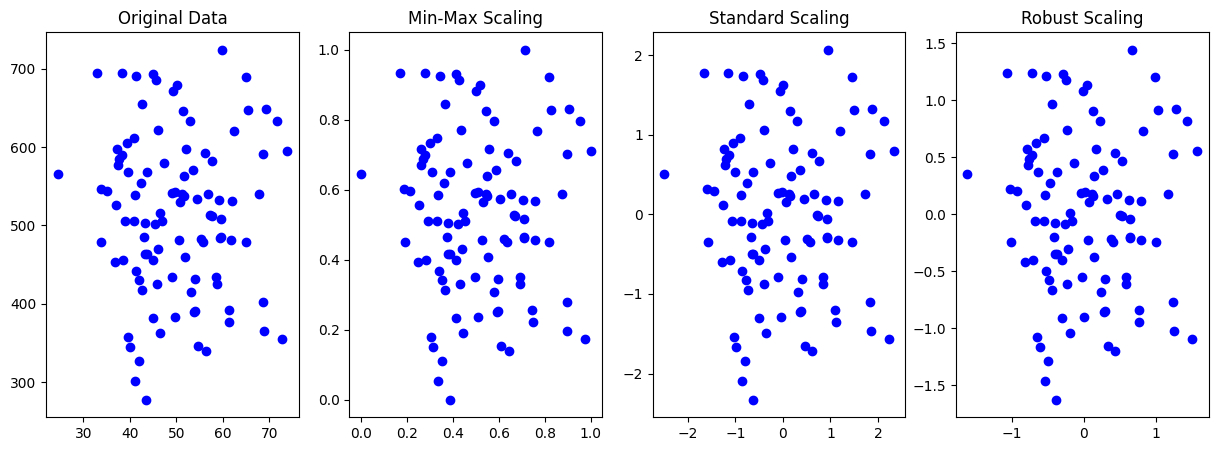

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Generate some data
np.random.seed(0)
data = np.random.randn(100, 2) * [10, 100] + [50, 500]

# Define scalers
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Plot original data
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue')
plt.title('Original Data')

# Apply each scaler and plot
for i, (scaler_name, scaler) in enumerate(scalers.items(), start=2):
    scaled_data = scaler.fit_transform(data)
    plt.subplot(1, 4, i)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c='blue')
    plt.title(scaler_name)

plt.show()


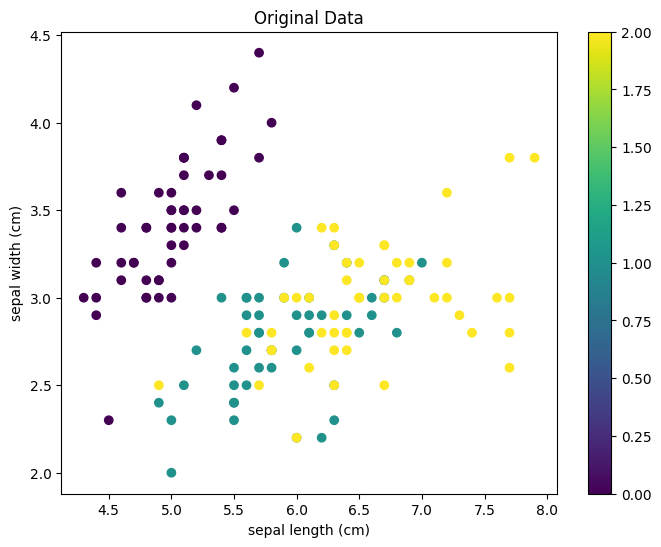

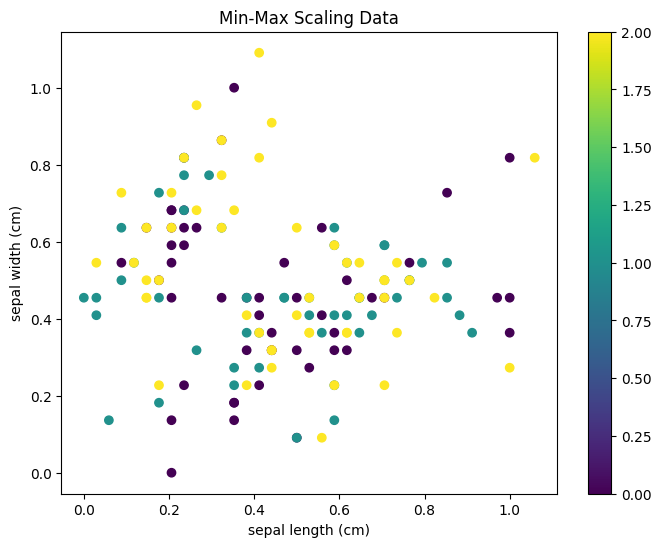

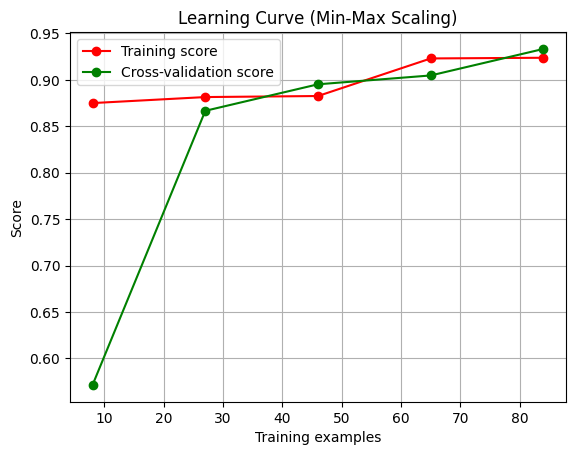

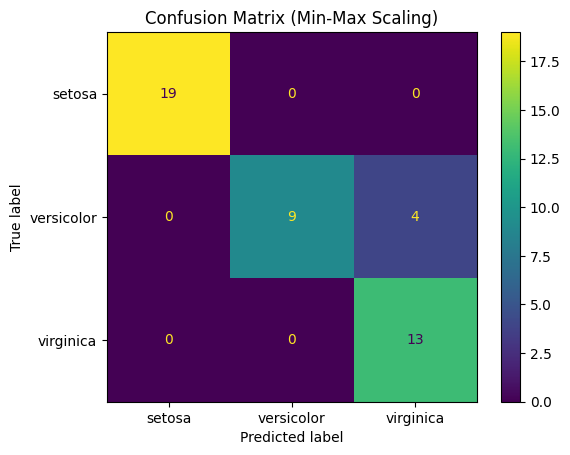

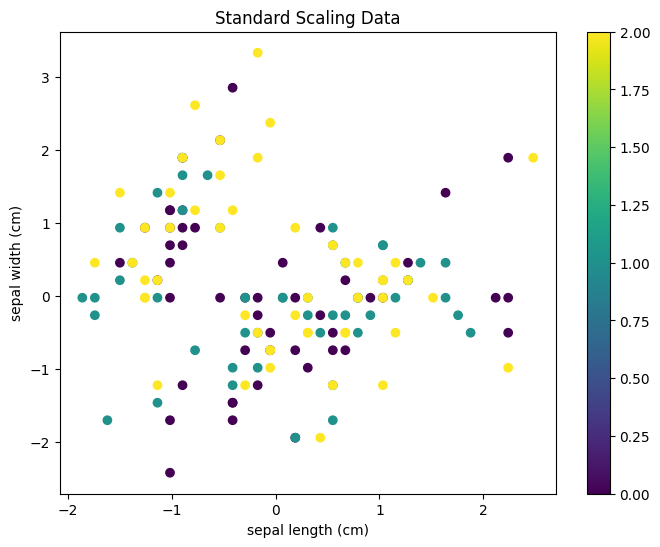

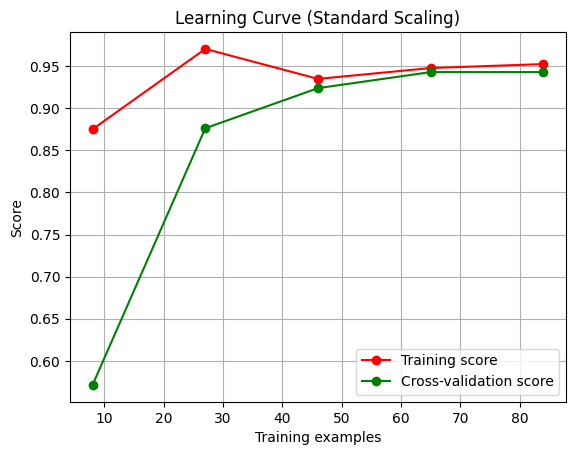

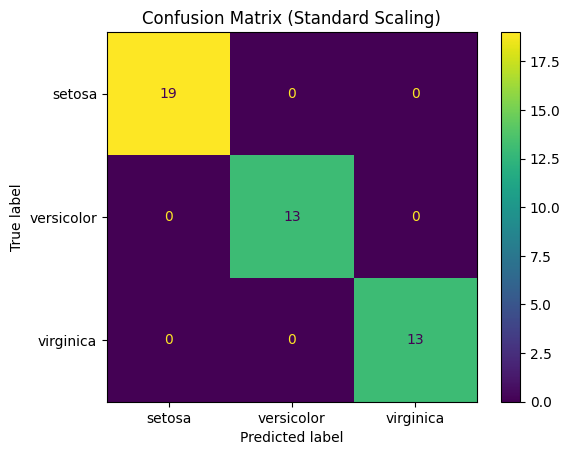

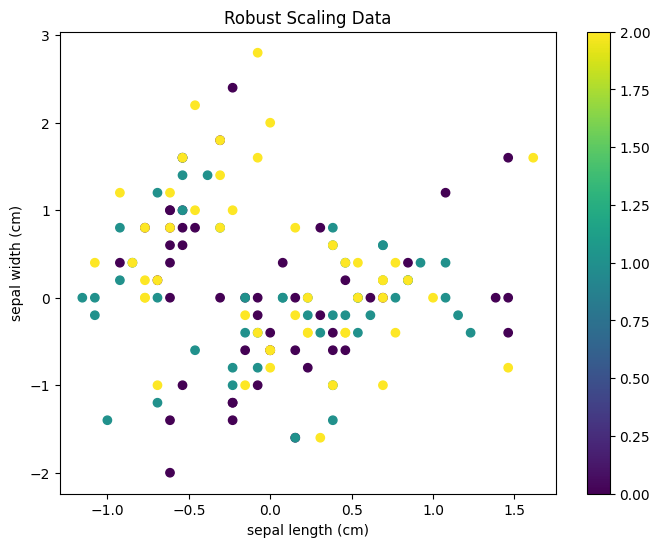

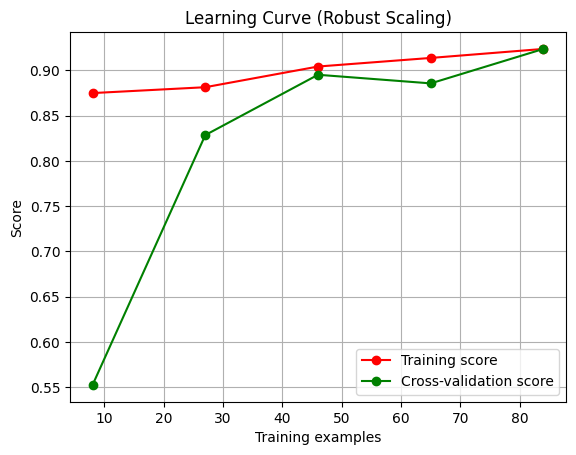

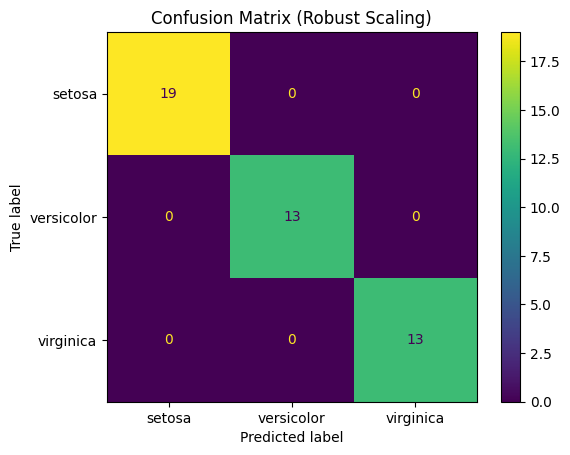

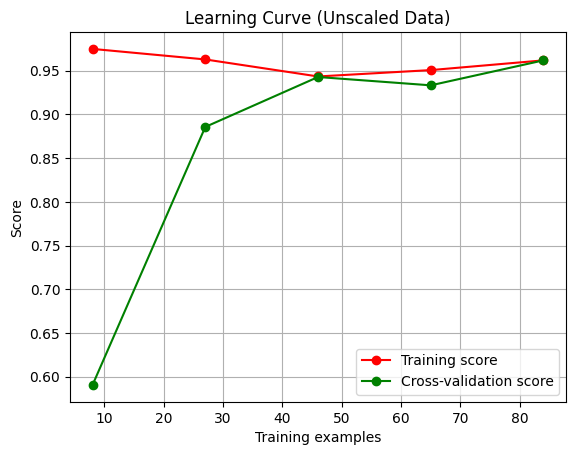

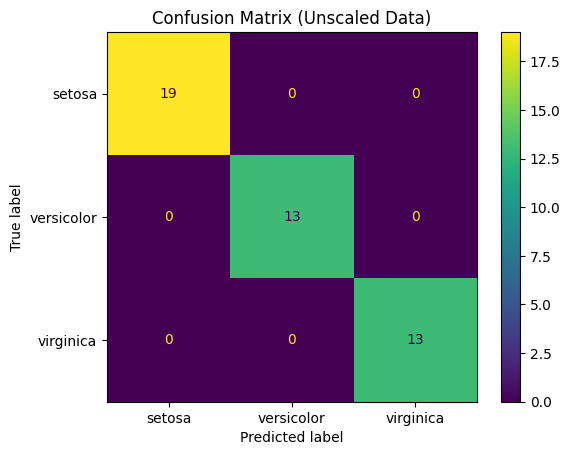

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define scalers
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotting function
def plot_data(X, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.colorbar()
    plt.show()

# Plot original data
plot_data(X, "Original Data")

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(estimator, X_test, y_test, title):
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot()
    plt.title(title)
    plt.show()

# Apply each scaler, plot data, and evaluate a logistic regression model
for scaler_name, scaler in scalers.items():
    # Fit and transform the data using the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Plot scaled data
    plot_data(np.vstack((X_train_scaled, X_test_scaled)), f"{scaler_name} Data")
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_scaled, y_train)
    
    # Plot learning curve
    plot_learning_curve(model, f"Learning Curve ({scaler_name})", X_train_scaled, y_train)
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, f"Confusion Matrix ({scaler_name})")

# Also plotting learning curve and confusion matrix for unscaled data
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
plot_learning_curve(model, "Learning Curve (Unscaled Data)", X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, "Confusion Matrix (Unscaled Data)")


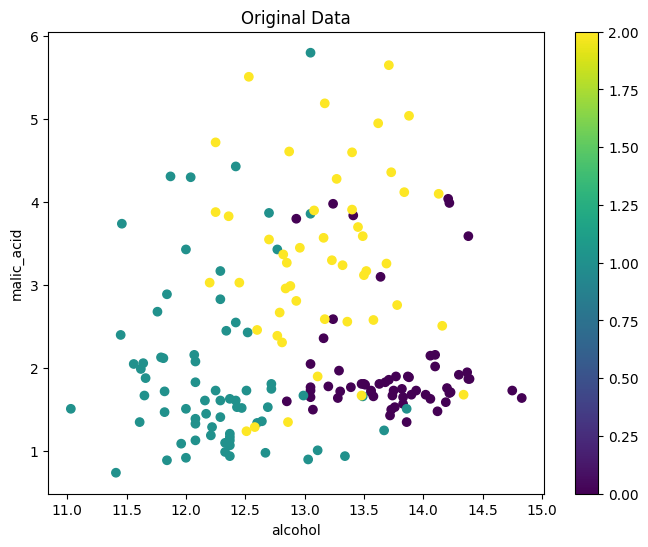

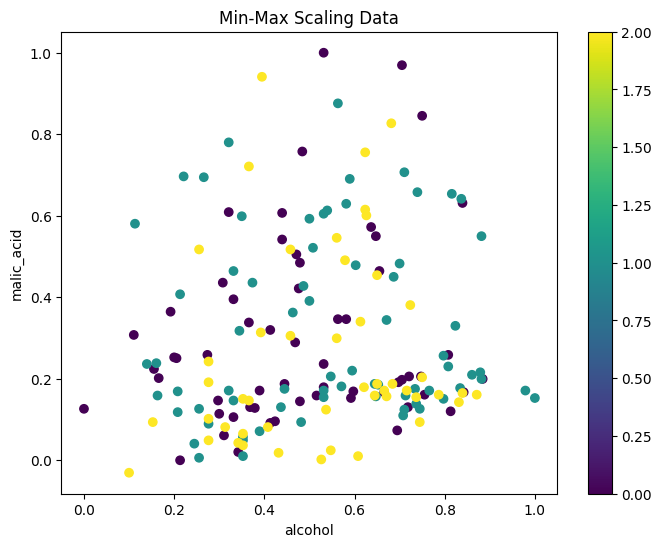

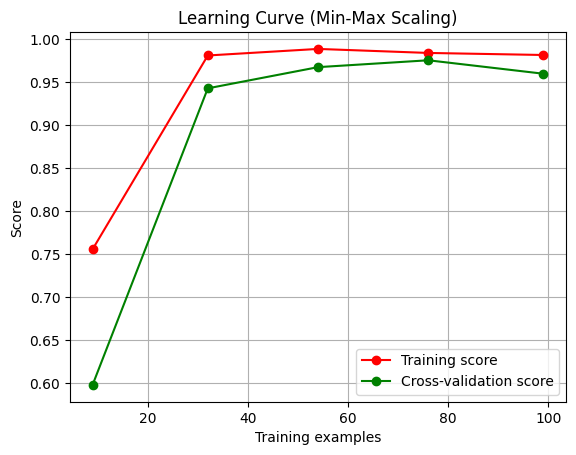

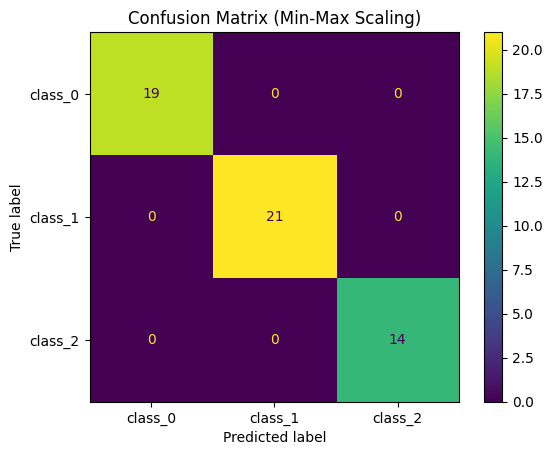

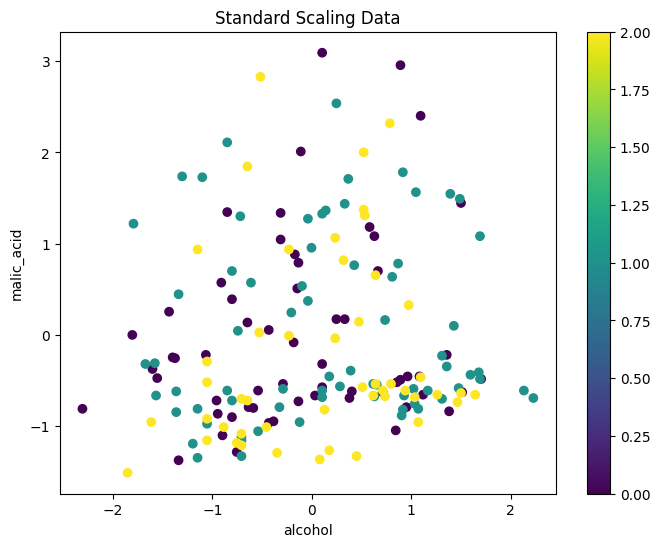

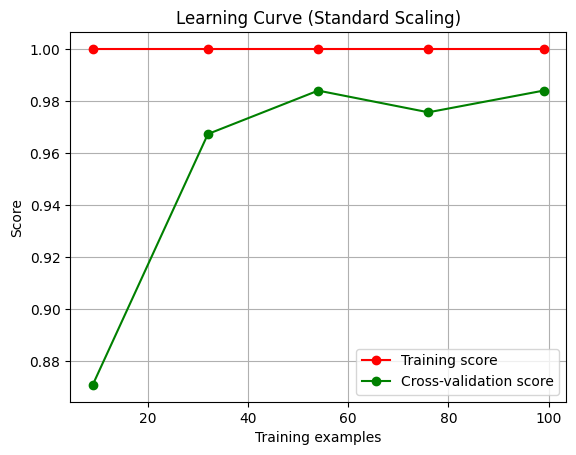

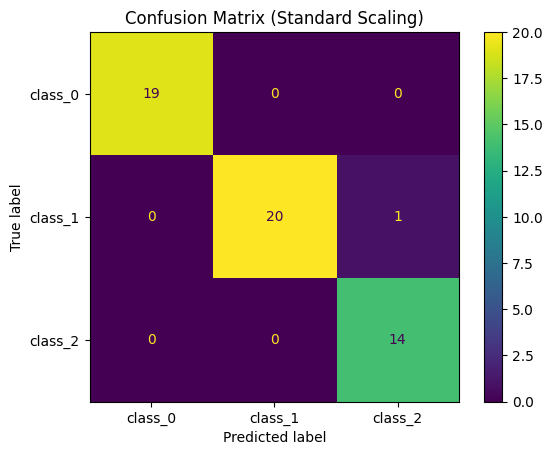

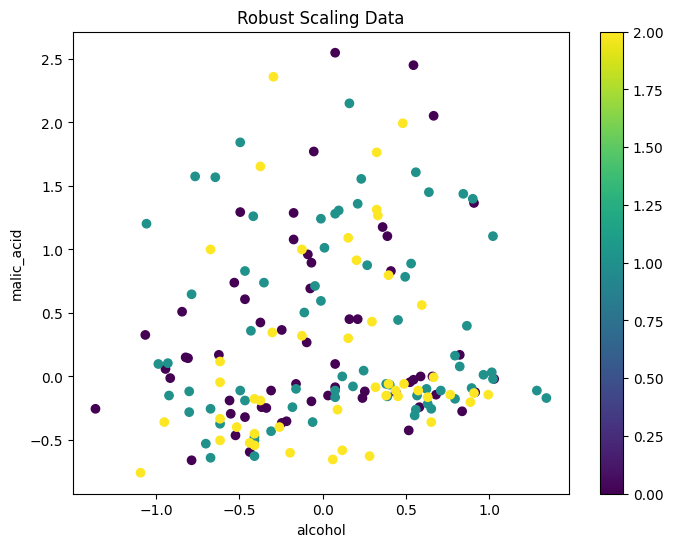

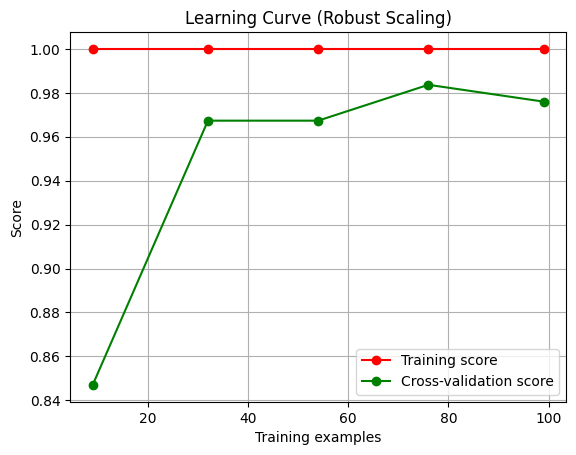

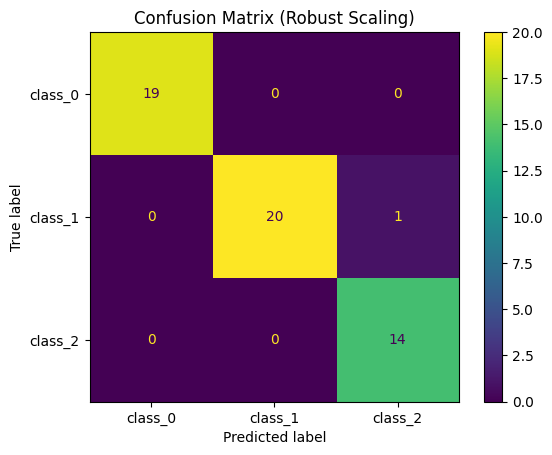

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


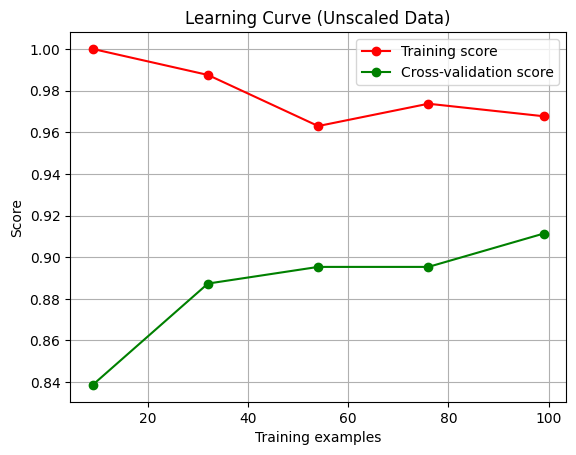

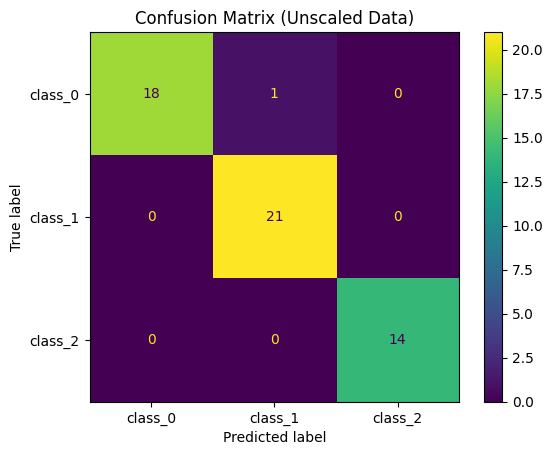

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Define scalers
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotting function
def plot_data(X, title, feature_indices=[0, 1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel(wine.feature_names[feature_indices[0]])
    plt.ylabel(wine.feature_names[feature_indices[1]])
    plt.colorbar()
    plt.show()

# Plot original data (using the first two features for visualization)
plot_data(X, "Original Data")

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(estimator, X_test, y_test, title):
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
    disp.plot()
    plt.title(title)
    plt.show()

# Apply each scaler, plot data, and evaluate a logistic regression model
for scaler_name, scaler in scalers.items():
    # Fit and transform the data using the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Plot scaled data (using the first two features for visualization)
    plot_data(np.vstack((X_train_scaled, X_test_scaled)), f"{scaler_name} Data")
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_scaled, y_train)
    
    # Plot learning curve
    plot_learning_curve(model, f"Learning Curve ({scaler_name})", X_train_scaled, y_train)
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, f"Confusion Matrix ({scaler_name})")

# Also plotting learning curve and confusion matrix for unscaled data
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
plot_learning_curve(model, "Learning Curve (Unscaled Data)", X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, "Confusion Matrix (Unscaled Data)")
